# Regression Analysis

A set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features').

Linear regression is a common technique for regression analysis. It was used to predict the value of the dependent variable based on the value of independent variables. The dependent variable is the variable you want to estimate. The indipendent variables are used to predict the dependent variable.
1. Simple Linear regression
2. Multiple linear regression
3. Logistic Regression
4. Ridge Regression
5. Lasso Regression
 
    
Nonlinear regression is used when the relationship between the dependent and independent variables cannot be adequately modeled by a linear equation. It allows for more complex functional forms, such as exponential, logarithmic, or sigmoidal curves.
1. Polynomial Regression
2. Gaussian Regression
3. Logarithmic Regression
4. Kernel Regression

The linearity assumption can be explored using scatter plots. 

A heatmap can be a nice helper for correlation analysis.

We will mainly cover the linear models. If you need more nonlinear topics, please reach out to Dr.Junyao Yang. 

### Basic Assumptions

**Linearity**: The relationship between the independent variables (predictors) and the dependent variable (response) is linear. This means that the change in the response variable is directly proportional to the change in the predictor variables.

**Independence**: The observations are independent of each other. In other words, the value of one observation does not influence the value of another observation.

**Homoscedasticity**: The variance of the residuals (the differences between the observed and predicted values) is constant across all levels of the predictors. This means that the spread of the residuals is consistent along the range of predictor variables.

**Normality**: The residuals are normally distributed. This assumption ensures that the parameter estimates (coefficients) obtained from the regression analysis are unbiased and efficient. Typical checked after the regression analysis.


**No multicollinearity**: There is no perfect multicollinearity among the independent variables. Multicollinearity occurs when two or more predictors are highly correlated, which can lead to unstable parameter estimates.

**No influential outliers**: The presence of influential outliers (extreme values) in the data can disproportionately influence the parameter estimates and affect the overall fit of the model.

In [1]:
# Loading libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname = "../../data/kc_house_data.csv"
df = pd.read_csv(fname)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


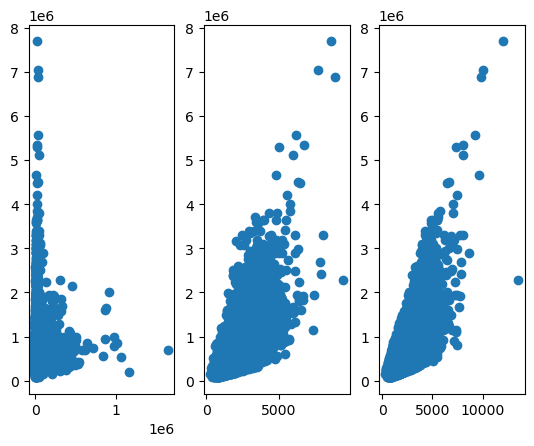

In [2]:
# scatter plot for sqft_lot and price
fig, ax = plt.subplots(1, 3)

ax[0].scatter(df['sqft_lot'], df['price'])

ax[1].scatter(df['sqft_above'], df['price'])
ax[2].scatter(df['sqft_living'], df['price'])
plt.show()

As we talked before, it looks like that the sqft_above and sqft_living have some linear relation to price. <br>
We can create a simple linear regression model for each of the variables. 

In [3]:
### Normally, we will split the data to train set and test set. 
### We will use the train set to build the regression model.
### And the test set is used to verify the model.

# scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.
# It features various classification, regression and clustering algorithms including support-vector machines, 
# random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['sqft_above', 'sqft_living']], df['price'], train_size = 0.8, random_state = 2024)
X_train, X_test, y_train, y_test

(       sqft_above  sqft_living
 16376        2600         2600
 12864        1070         1070
 17163         750          750
 11228         720          720
 8464         1010         1450
 ...           ...          ...
 14875        2690         2690
 2688         1730         2240
 19040         720         1440
 19962        1630         2170
 7816         2290         2290
 
 [17290 rows x 2 columns],
        sqft_above  sqft_living
 12201        1480         1480
 19557        1090         1640
 7169          840          840
 282          2630         3830
 8227         3630         4330
 ...           ...          ...
 6425         1230         2230
 1319         1430         1620
 15291        1510         2210
 17509         780          780
 11072        2360         2360
 
 [4323 rows x 2 columns],
 16376    817000.0
 12864    319950.0
 17163    135000.0
 11228    310000.0
 8464     306000.0
            ...   
 14875    419000.0
 2688     415000.0
 19040    285000.0
 199

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # consider both sqft_above and sqft_living at the same time
model_above = LinearRegression() # consider sqft_above
model_living = LinearRegression() # consider sqft_living

In [8]:
### reshape your data
# print(np.array(X_train['sqft_above']).reshape(-1, 1))

# Step 6 : train or fit model
model.fit(np.array(X_train), y_train)
model_above.fit(np.array(X_train['sqft_above']).reshape(-1, 1), y_train)
model_living.fit(np.array(X_train['sqft_living']).reshape(-1, 1), y_train)

LinearRegression()

y = a x1 + b x2 + c,  you want to know the value of a, b ,c
y_above = k x + m, you want to know the value of k , m
y_living = n x + o, you want to know the value of n, o

In [9]:
model_above.intercept_, model_above.coef_, model_living.intercept_, model_living.coef_

(59703.71252844081,
 array([268.38202164]),
 -38208.55562535033,
 array([277.95190824]))

In [10]:
model.intercept_, model.coef_

(-37159.207848828984, array([ -7.41219241, 283.82493301]))

price = -7.412 * sqft_above + 283.82 * sqft_living + -37159.21

price = 268.38 * sqft_above + 59703.71

price = 277.95 * sqft_living -38208.55

In [8]:
# Step 7 : predict model
above_pred = model_above.predict(np.array(X_test['sqft_above']).reshape(-1, 1))
living_pred = model_living.predict(np.array(X_test['sqft_living']).reshape(-1, 1))

In [9]:
above_pred, living_pred

(array([456909.10454888, 352240.11611106, 285144.6107022 , ...,
        464960.56519795, 269041.68940408, 693085.28358806]),
 array([373160.26857208, 417632.57389072, 195271.04729752, ...,
        576065.16158839, 178593.93280303, 617757.94782461]))

In [10]:
# the smaller the error is, the better the model will be.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# above
print(mean_absolute_error(y_test, above_pred), mean_absolute_percentage_error(y_test, above_pred), mean_squared_error(y_test, above_pred))
# living
print(mean_absolute_error(y_test, living_pred), mean_absolute_percentage_error(y_test, living_pred), mean_squared_error(y_test, living_pred))

193549.97661653874 0.4026326187239139 95269060643.77367
171688.24844675415 0.35587611080168424 72510369727.06268


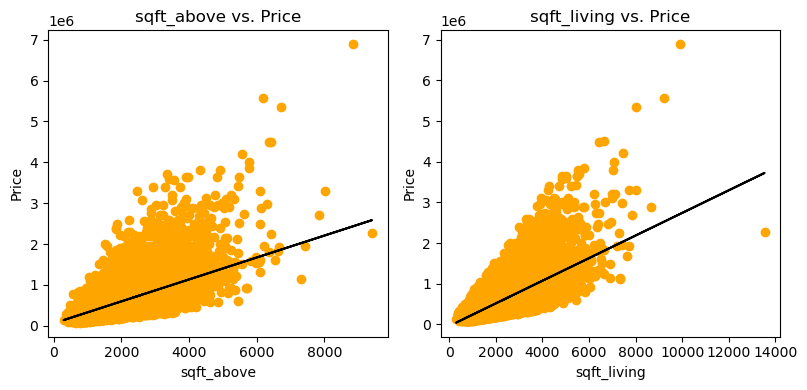

In [11]:
# plot the regression model in the decision space.

# scatter plot for sqft_lot and price
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot for sqft_above
ax[0].scatter(X_train['sqft_above'], y_train, color='orange')
ax[0].plot(X_train['sqft_above'], model_above.predict(np.array(X_train['sqft_above']).reshape(-1, 1)), color='k')
ax[0].set_title('sqft_above vs. Price')
ax[0].set_xlabel('sqft_above')
ax[0].set_ylabel('Price')

# Plot for sqft_living
ax[1].scatter(X_train['sqft_living'], y_train, color='orange')
ax[1].plot(X_train['sqft_living'], model_living.predict(np.array(X_train['sqft_living']).reshape(-1, 1)), color='k')
ax[1].set_title('sqft_living vs. Price')
ax[1].set_xlabel('sqft_living')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

### Let's check the Normality after building the regression model.

In linear regression, one of the assumptions is that the residuals (the differences between the observed and predicted values) are normally distributed. If this assumption is violated, it can affect the validity of the statistical inference and predictions made by the model.

In [12]:
### if your sample size is less than 5000
from scipy import stats

# Calculate the residule
residule = y_test - model_living.predict(np.array(X_test['sqft_above']).reshape(-1, 1))
#residule = y_test - model_living.predict(np.array(X_test['sqft_living']).reshape(-1, 1))
                             

# Perform Shapiro-Wilk test
stat, p = stats.shapiro(residule)

# Print the results
print("Shapiro-Wilk Test:")
print("Test Statistic:", stat)
print("p-value:", p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Test:
Test Statistic: 0.7548332810401917
p-value: 0.0
Sample does not look Gaussian (reject H0)


**Impact on Inference:** If the residuals are not normally distributed, it can affect the estimates of the regression coefficients, standard errors, and confidence intervals. This can lead to biased or unreliable results.

**Model Fit:** Checking the normality of residuals also helps to assess the overall fit of the regression model. A departure from normality may indicate that the model is not capturing some underlying patterns in the data.

### Heatmap

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are useful for visualizing data patterns, such as correlations, across two dimensions (e.g., rows and columns of a matrix).

In a heatmap, each cell is colored based on its value, typically using a color gradient. The color intensity represents the magnitude of the value, with brighter colors indicating higher values and darker colors indicating lower values. Heatmaps are commonly used in various fields, including data analysis, biology, and finance, to visualize complex data and identify trends or patterns.

In our example, we want to explore the correlation between the features. Recall that if there is a strong correlation among the independent variables, our regression may be baised or unreliable. So it is necessary for us to check the correlation before regression analysis.

We will consider three features/independent variables for a heatmap construction using the house data, sqrt_lot, sqrt_living, and sqrt_above.
Thus, we will have 3 by 3 heatmap. 

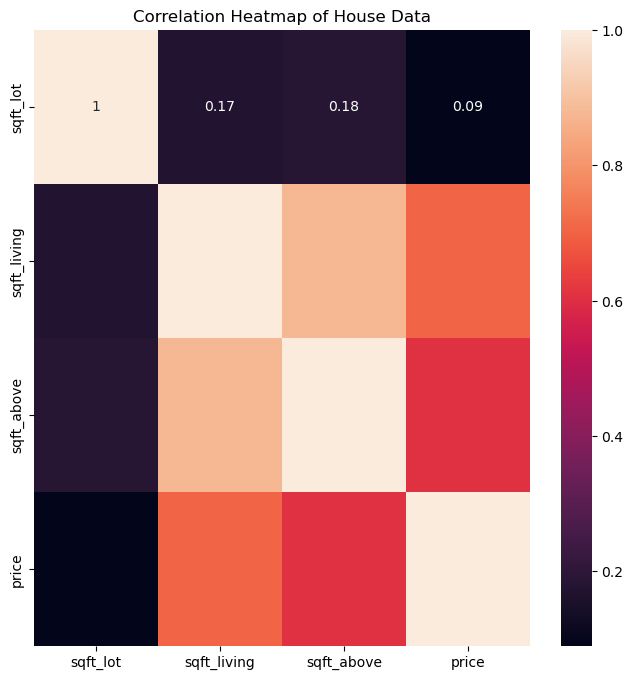

In [16]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df[["sqft_lot", "sqft_living", "sqft_above", 'price']].corr()

# construct the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of House Data')
plt.show()

As showing above, we use the heatmap with numbers labels in each area to show the correlation among these three independent variables.

A heatmaps will always have a value of 1 for all diagonal line. Because it represents the correlation that is calculated using itself. 

A correlation coefficient of 1 indicates a perfect positive linear relationship between two variables. It means that as one variable increases, the other variable also increases proportionally, and vice versa. However, it does not necessarily mean that the two variables are the same.

For example, it reads 0.18, close to 0, for the first row and third area, which indicates a less or none correlation between sqft_above and sqft_lot. But for sqft_above and sqft_living, 0.88, close to 1, indicates a strong positive correlation. If you see a correlation value, for example, -0.88, it means a strong negative correlation.

Indeed, this heatmap indicates multicollinearity between sqft_above and sqft_living, which may cause issues in our linear regression model. The reaults may not be reliable. 

If multicollinearity is detected, there are several steps that can be taken to address it, such as removing one of the correlated variables, combining the variables into a single variable, or using regularization techniques like ridge regression.